# Project 1 - Submission

# Mercedes-Benz Greener Manufacturing

**DESCRIPTION**

Reduce the time a Mercedes-Benz spends on the test bench.

**Problem Statement Scenario:**
    <br>
Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with a crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. Mercedes-Benz is the leader in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of every unique car configuration before they hit the road, the company’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Mercedes-Benz’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.

You are required to reduce the time that cars spend on the test bench. Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Mercedes-Benz’s standards.

**Following actions should be performed:**

    * If for any column(s), the variance is equal to zero, then you need to remove those variable(s).
    * Check for null and unique values for test and train sets.
    * Apply label encoder.
    * Perform dimensionality reduction.
    * Predict your test_df values using XGBoost.

## Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import gc
import seaborn as sns
palette = sns.color_palette()
sns.set()
%matplotlib inline

## Importing train data

In [2]:

df_train = pd.read_csv('C:\\Users\\DELL\\Desktop\\Machine-Learning\\Machine-Learning--Projects-master\\Projects\\Projects for Submission\\Project 1 - Mercedes-Benz Greener Manufacturing\\Dataset for the project\\train.csv')


## Printing shape of data

In [3]:

print('Size of training set: {} rows and {} columns'.format(*df_train.shape))

Size of training set: 4209 rows and 378 columns


## Printing first 5 rows 


In [4]:
df_train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


#### There are total 378 columns given. The feature names are not given. There are total 4209 rows are given means 4209 observations are given. 

#### ID column is not of usual index, it is representing some other significant index. It might the case that from a same dataset, test and train data are splitted and hence ID are different numbers.

#### y column is might be the label column which are given in seconds as our aim is to reduce the time spent.

## Exploratory Data Analysis

### Data description


In [5]:
df_train.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Checking for missing values

In [6]:
df_train.isnull().sum()

ID      0
y       0
X0      0
X1      0
X2      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 378, dtype: int64

#### It seems there are no missing values

### Checking the information of the data

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


### Checking the distribution of label column y

min: 72.11 
max: 265.32 
mean: 100.66931812782134 
std: 12.6778749695168 
Count of values above 180: 1


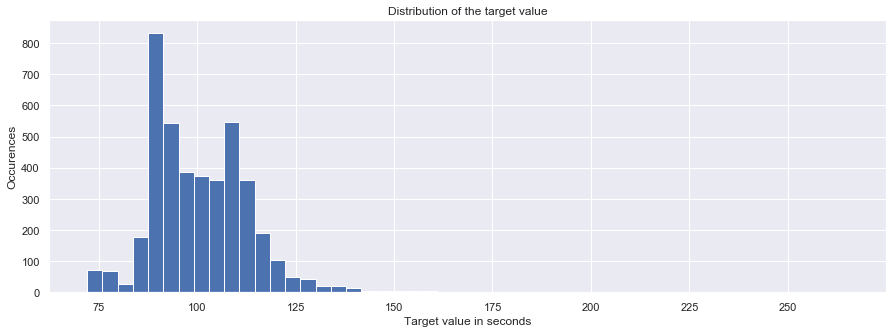

In [8]:
y_train = df_train['y'].values
plt.figure(figsize=(15, 5))
plt.hist(y_train, bins=50)
plt.xlabel('Target value in seconds')
plt.ylabel('Occurences')
plt.title('Distribution of the target value')

print('min: {} '.format(min(y_train)))
print('max: {} '.format(max(y_train)))
print('mean: {} '.format(y_train.mean()))
print('std: {} '.format(y_train.std()))
       
print('Count of values above 180: {}'.format(np.sum(y_train > 200)))

#### Distribution seems pretty much standard normal.

#### Distribution is centered around 100.

#### All the data points of label are below 180. It seems there is only one outlier here.

## Is it a time series data ?

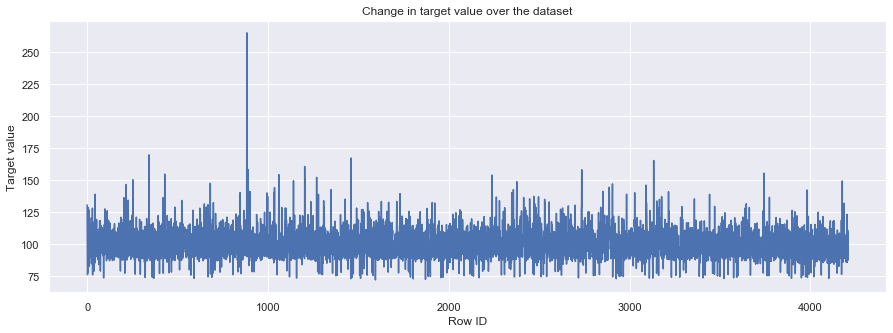

Text(0.5, 1.0, 'Change in target value over the dataset (first 100 samples)')

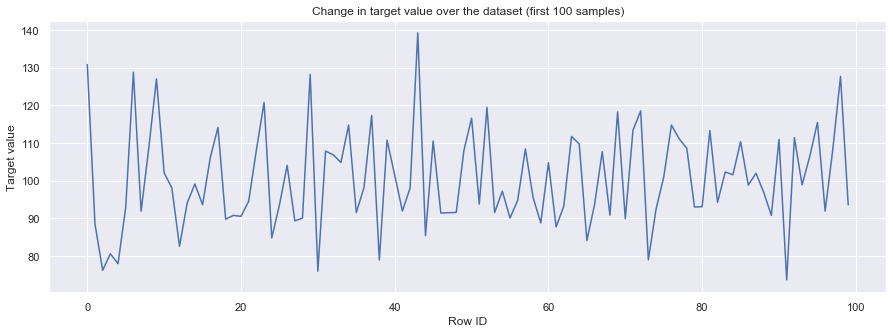

In [9]:
plt.figure(figsize=(15, 5))
plt.plot(y_train)
plt.xlabel('Row ID')
plt.ylabel('Target value')
plt.title('Change in target value over the dataset')
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(y_train[:100])
plt.xlabel('Row ID')
plt.ylabel('Target value')
plt.title('Change in target value over the dataset (first 100 samples)')


#### It seems pretty stationary. No pattern recognized.

#### At first glance, there doesn't seem to be anything overly suspicious here - looks like how a random sort would. We might take a closer look later but for now let's move on to the features.

## Feature Analysis

In [10]:
column_names = df_train.columns
cols = [c for c in column_names if 'X' in c]
print('Number of features: {}'.format(len(cols)))

print('Feature types:')
df_train[cols].dtypes.value_counts()

Number of features: 376
Feature types:


int64     368
object      8
dtype: int64

#### There are total 368 integer variables and 8 are string variables.

## Finding the no. of different types of features.

In [11]:
counts = [[], [], []]
for c in cols:
    typ = df_train[c].dtype
    uniq = len(np.unique(df_train[c]))
    if uniq == 1: counts[0].append(c)
    elif uniq == 2 and typ == np.int64: counts[1].append(c)
    else: counts[2].append(c)
l = [len(c) for c in counts]
print('Constant features: {}'.format(l[0]))
print('Binary features: {}'.format(l[1]))
print('Categorical features: {}'.format(l[2]))
print("\n")
print('Constant features:', counts[0])
print('Categorical features:', counts[2])


Constant features: 12
Binary features: 356
Categorical features: 8


Constant features: ['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']
Categorical features: ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']


## Checking column variance

In [12]:
df_train[counts[0]].var()

X11     0.0
X93     0.0
X107    0.0
X233    0.0
X235    0.0
X268    0.0
X289    0.0
X290    0.0
X293    0.0
X297    0.0
X330    0.0
X347    0.0
dtype: float64

## Constant features are zero-variance features.

#### Interestingly, we have 12 features which only have a single value in them - these are pretty useless for supervised algorithms, and should probably be dropped. 

#### The rest of our dataset is made up of many binary features, and a few categorical features.

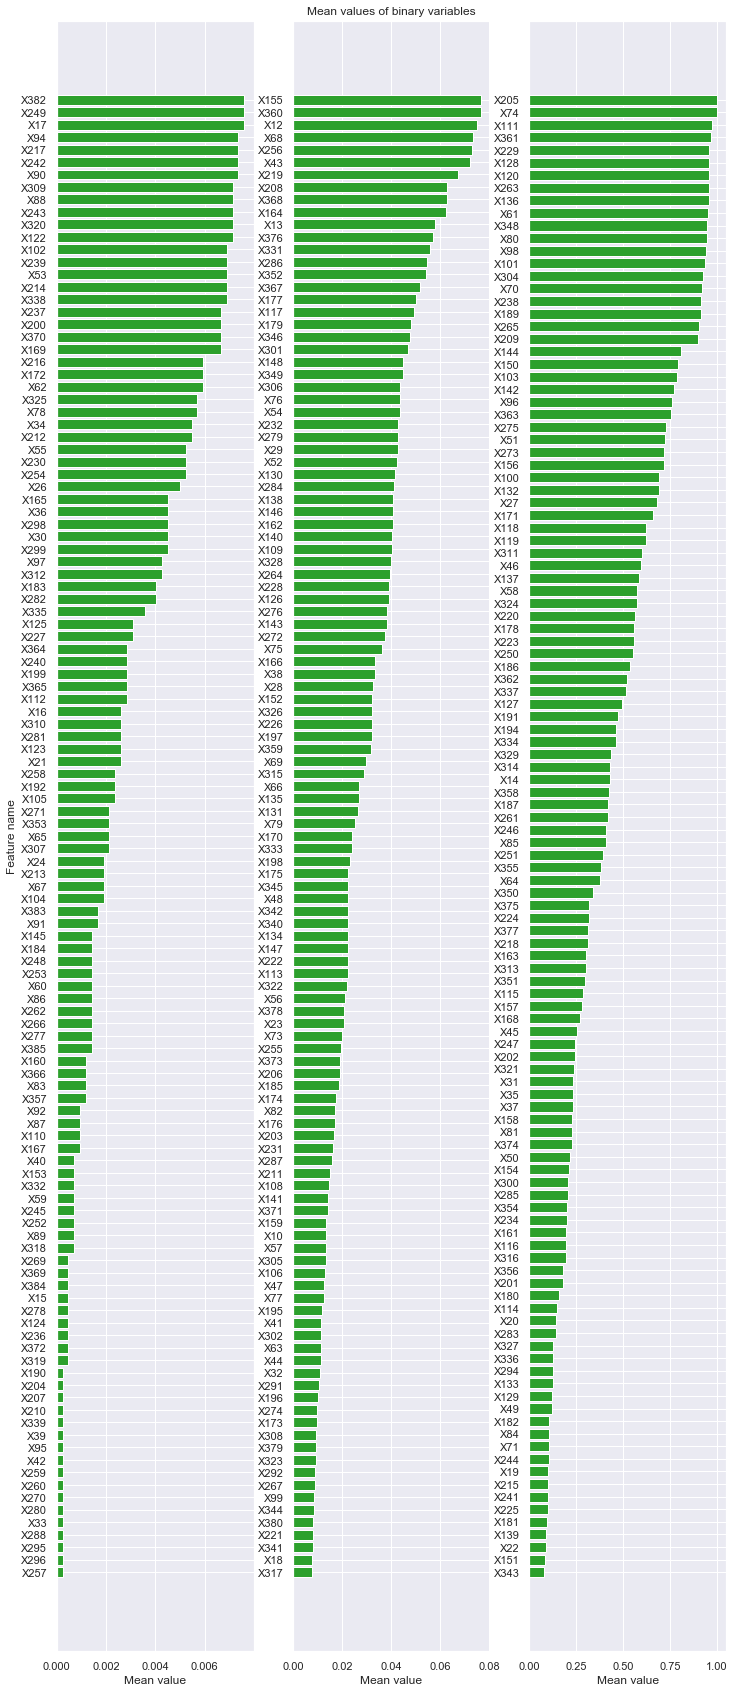

In [13]:
binary_means = [np.mean(df_train[c]) for c in counts[1]]
binary_names = np.array(counts[1])[np.argsort(binary_means)]
binary_means = np.sort(binary_means)

fig, ax = plt.subplots(1, 3, figsize=(12,30))
ax[0].set_ylabel('Feature name')
ax[1].set_title('Mean values of binary variables')
for i in range(3):
    names, means = binary_names[i*119:(i+1)*119], binary_means[i*119:(i+1)*119]
    ax[i].barh(range(len(means)), means, color=palette[2])
    ax[i].set_xlabel('Mean value')
    ax[i].set_yticks(range(len(means)))
    ax[i].set_yticklabels(names, rotation='horizontal')
plt.show()


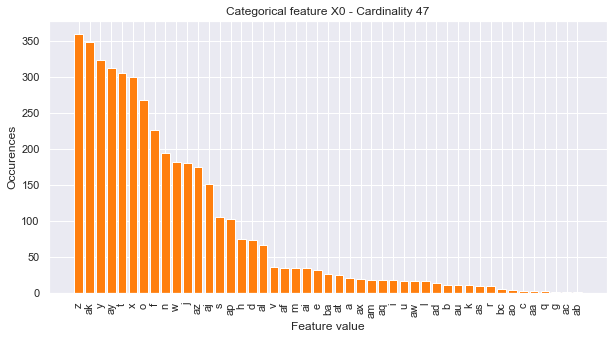

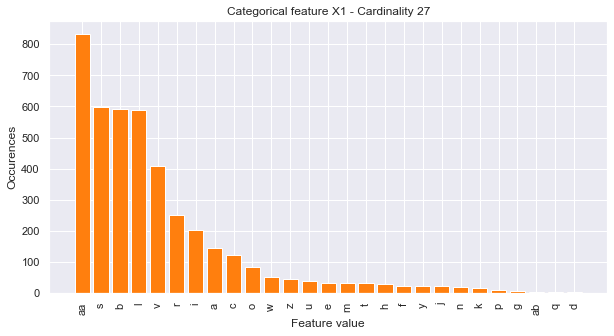

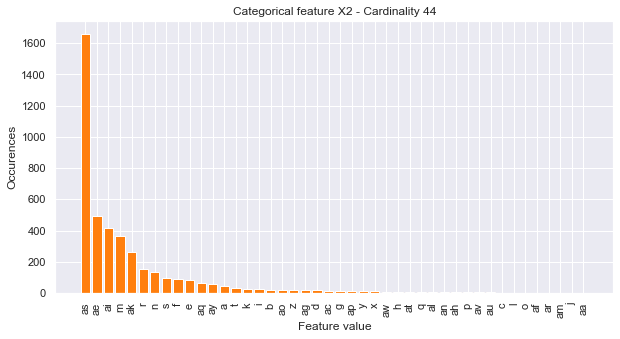

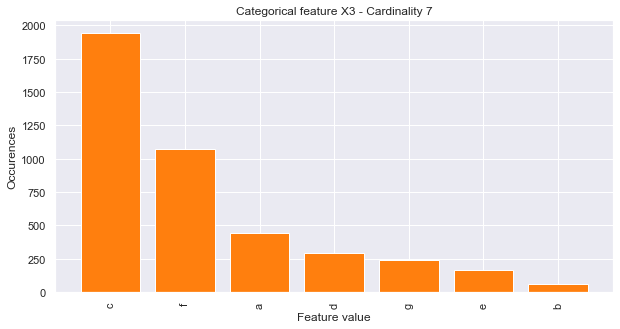

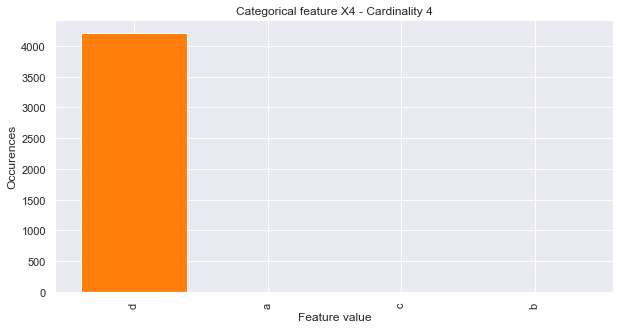

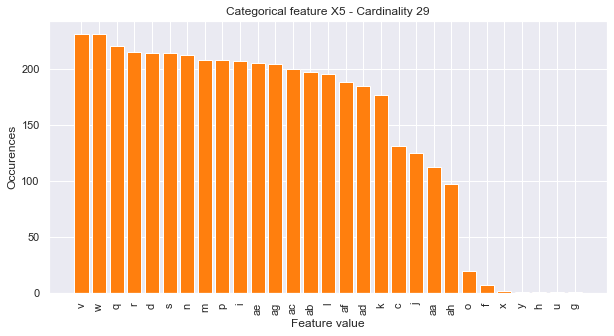

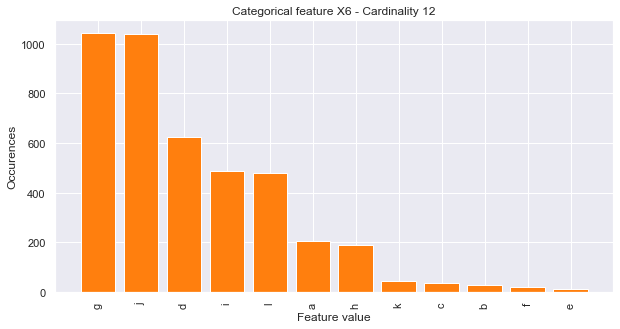

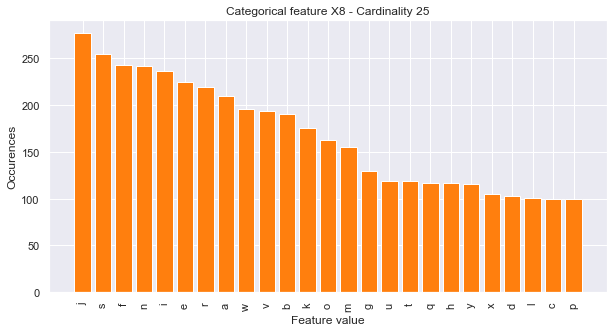

In [14]:
for c in counts[2]:
    value_counts = df_train[c].value_counts()
    fig, ax = plt.subplots(figsize=(10, 5))
    plt.title('Categorical feature {} - Cardinality {}'.format(c, len(np.unique(df_train[c]))))
    plt.xlabel('Feature value')
    plt.ylabel('Occurences')
    plt.bar(range(len(value_counts)), value_counts.values, color=palette[1])
    ax.set_xticks(range(len(value_counts)))
    ax.set_xticklabels(value_counts.index, rotation='vertical')
    plt.show()

### Importing test data

In [15]:
df_test = pd.read_csv('C:\\Users\\DELL\\Desktop\\Machine-Learning\\Machine-Learning--Projects-master\\Projects\\Projects for Submission\\Project 1 - Mercedes-Benz Greener Manufacturing\\Dataset for the project\\test.csv')

In [16]:
df_test.columns

Index(['ID', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'X10',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=377)

### Dimensionality Reduction for both train and test data

In [17]:
usable_columns = list(set(df_train.columns) - set(['ID', 'y']))

y_train = df_train['y'].values
id_test = df_test['ID'].values

x_train = df_train[usable_columns]
x_test = df_test[usable_columns]

for column in usable_columns:
    cardinality = len(np.unique(x_train[column]))
    if cardinality == 1:
        x_train.drop(column, axis=1) # Column with only one value is useless so we drop it
        x_test.drop(column, axis=1)
    if cardinality > 2: # Column is categorical
        mapper = lambda x: sum([ord(digit) for digit in x])
        x_train[column] = x_train[column].apply(mapper)
        x_test[column] = x_test[column].apply(mapper)
        
x_train[['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']].head()

F:\anaconda\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
F:\anaconda\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,X0,X1,X2,X3,X4,X5,X6,X8
0,107,118,213,97,100,117,106,111
1,107,116,215,101,100,121,108,111
2,219,119,110,99,100,120,106,120
3,219,116,110,102,100,120,108,101
4,219,118,110,102,100,104,100,110


# XGBoost Model Fitting

### Importing libraries

In [18]:
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

### Splitting train data into train and validation sets

In [19]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=4242)

d_train = xgb.DMatrix(x_train, label=y_train)
d_valid = xgb.DMatrix(x_valid, label=y_valid)

d_test = xgb.DMatrix(x_test)

params = {}
params['objective'] = 'reg:linear'
params['eta'] = 0.02
params['max_depth'] = 4

def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

clf = xgb.train(params, d_train, 1000, watchlist, early_stopping_rounds=50, feval=xgb_r2_score, maximize=True, verbose_eval=10)


[11:39:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:99.1397	valid-rmse:98.2538	train-r2:-58.3426	valid-r2:-67.6247
Multiple eval metrics have been passed: 'valid-r2' will be used for early stopping.

Will train until valid-r2 hasn't improved in 50 rounds.
[10]	train-rmse:81.1832	valid-rmse:80.2714	train-r2:-38.7928	valid-r2:-44.804
[20]	train-rmse:66.541	valid-rmse:65.5967	train-r2:-25.7332	valid-r2:-29.5876
[30]	train-rmse:54.6149	valid-rmse:53.6305	train-r2:-17.0092	valid-r2:-19.4459
[40]	train-rmse:44.9172	valid-rmse:43.8842	train-r2:-11.1814	valid-r2:-12.6899
[50]	train-rmse:37.0508	valid-rmse:35.9587	train-r2:-7.28831	valid-r2:-8.19158
[60]	train-rmse:30.6913	valid-rmse:29.5289	train-r2:-4.68723	valid-r2:-5.19837
[70]	train-rmse:25.5745	valid-rmse:24.3342	train-r2:-2.949	valid-r2:-3.20936
[80]	train-rmse:21.4844	valid-rmse:20.1622	train-r2:-1.78687	valid-r2:-1.88973
[90]	train-rmse:18.2427	valid-rmse:16

# Predicting XGBoost Model on test data

In [20]:
p_test = clf.predict(d_test)

predictions = pd.DataFrame()
predictions['ID'] = id_test
predictions['y'] = p_test

In [21]:
predictions

,ID,y
0,1,89.522064
1,2,105.298737
2,3,89.935326
3,4,77.471291
4,5,111.139229
...,...,...
4204,8410,102.779503
4205,8411,92.947731
4206,8413,92.751747
4207,8414,110.757317


# Done!